# <span style="color:blue">EVAC Workshop 3: Multi-objective evolution</span>

**Module leader**

Simon O'Keefe: simon.okeefe@york.ac.uk

**Graduate Teaching Assistants**

Danny Roberts: danny.roberts@york.ac.uk

Tianda Sun: tianda.sun@york.ac.uk

## <span style="color:#0073e6">Prerequisites</span>


Before participating in this practical make sure that you have watched the the pre-workshop materials:
- Lecture 3
- Code walkthrough 5


# <span style="color:blue">Learning Objectives</span>

* Implement individuals with different representations to lists
* Implement and then examine multi-objective evolution
* Implement the Mu + Lamda algorithm manually, as needed for NGSA II

# <span style="color:blue">The problem: the kursawe function</span>

The Kursawe function has two objectives (see two equations below) that we want to minimize. It can have an arbirtarly number *N* of input variables *xi*, which take values within the range -5 and 5.

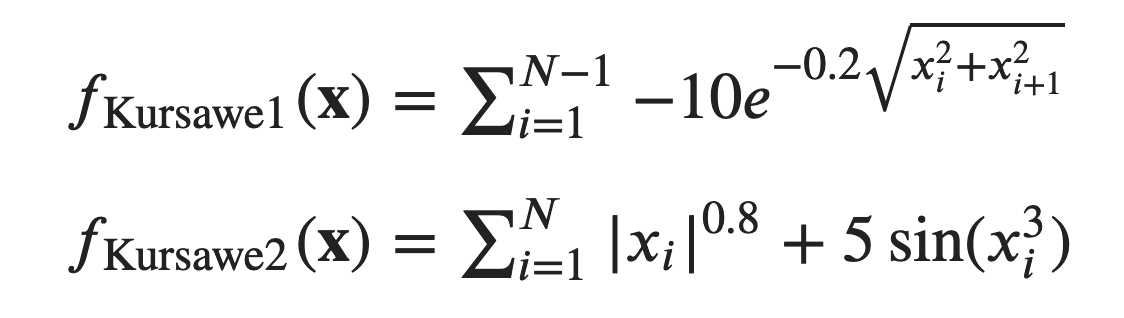

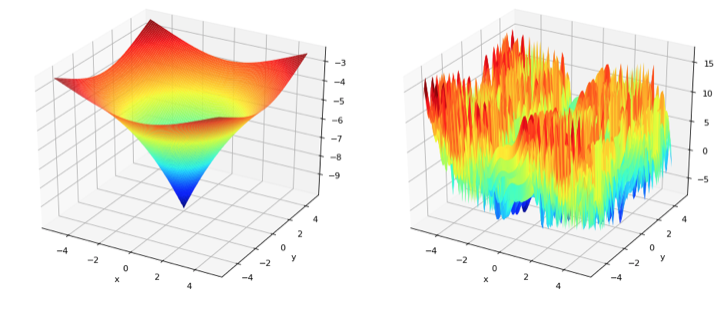

There are built-in benchmark problems in DEAP. You import them like this:

In [55]:
from deap import benchmarks

The kursawe function can be called like this:

In [56]:
exampleInputs = [-5, 2, 5]
benchmarks.kursawe(exampleInputs)

(-6.812092298638419, 13.935688996486114)

# <span style="color:blue">Task 1: Implement a multi objective GA for the kursawe function</span>

Create a GA that gives inputs that minimize the multi-objective function. For this, the number of inputs to use should be 3 to start with (which you can visualize). Then try changing it to 5.

## <span style="color:blue">GA Code Here</span>

In [57]:
NGEN = 250
CXPB = 0.5
MUTPB = 0.2
popSize = MU = 200
LAMBDA = 400

In [58]:
import random
from deap import base, creator, tools

creator.create("Fitness", base.Fitness, weights=(-1.0, -1.0))  # minimising both
creator.create("Individual", list, fitness=creator.Fitness)
toolbox = base.Toolbox()
toolbox.register("attr_kursawe_bounds", random.uniform, -5.0, 5.0)
toolbox.register(
    "individual", tools.initRepeat, creator.Individual, toolbox.attr_kursawe_bounds, 3
)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.4, indpb=0.2)
toolbox.register("evaluate", benchmarks.kursawe)
toolbox.register("select", tools.selNSGA2)

/Users/ivanbar/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/ivanbar/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [59]:
import numpy as np

pop = toolbox.population(n=popSize)
hof = tools.ParetoFront(similar=np.allclose)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

In [60]:
from deap import algorithms

pop, log = algorithms.eaMuPlusLambda(
    pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats, halloffame=hof
)

gen	nevals	avg                      	std                    	min                        	max                      
0  	200   	[-9.49929092  6.06859623]	[2.20111446 6.41343095]	[-16.72298659  -8.4292389 ]	[-5.45395452 22.50250295]
1  	279   	[-11.06944171   0.64239731]	[2.29213142 4.5182943 ]	[-17.6781685  -8.4292389]  	[-6.26774641 12.38208972]
2  	285   	[-12.65749428  -2.25844378]	[2.34945496 3.701308  ]	[-17.6781685   -9.59812862]	[-6.70758143  7.64255547]
3  	274   	[-14.03428988  -3.92058928]	[2.28635473 3.88680011]	[-18.52821829  -9.59812862]	[-8.69994561  6.12909985]
4  	282   	[-15.1943598   -4.60129711]	[1.83971518 3.37166059]	[-18.75779526 -10.64443964]	[-10.47941995   6.50192035]
5  	282   	[-15.83044182  -5.07448435]	[1.79397538 3.29105254]	[-18.75779526 -10.64443964]	[-10.47941995   0.96658603]
6  	274   	[-16.13652237  -5.76652608]	[1.44636779 3.37730017]	[-19.07492331 -11.46504738]	[-11.68320075   0.89514992]
7  	276   	[-16.06500821  -6.61205739]	[1.25125302 3.29511606]

## <span style="color:blue">Plot the results</span>

Text(0, 0.5, 'Fitness $Kursawe_1$')

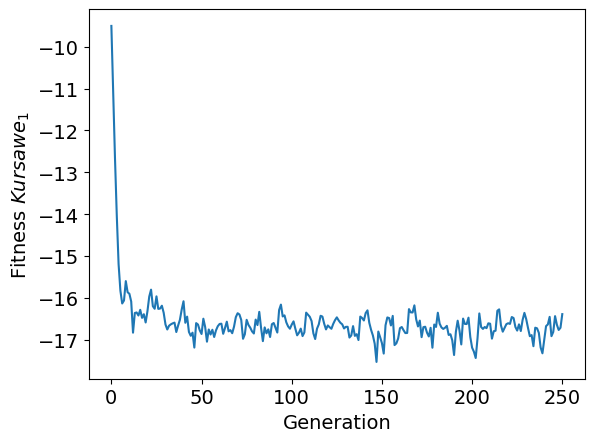

In [61]:
import matplotlib.pyplot as plt

gen = log.select("gen")
avgs = log.select("avg")
stds = log.select("std")
avgs_kurs_1 = [item[0] for item in avgs]
avgs_kurs_2 = [item[1] for item in avgs]
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("legend", fontsize=14)

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, avgs_kurs_1)
ax1.set_xlabel("Generation")
ax1.set_ylabel(r"Fitness $Kursawe_1$")

Text(0, 0.5, 'Fitness $Kursawe_2$')

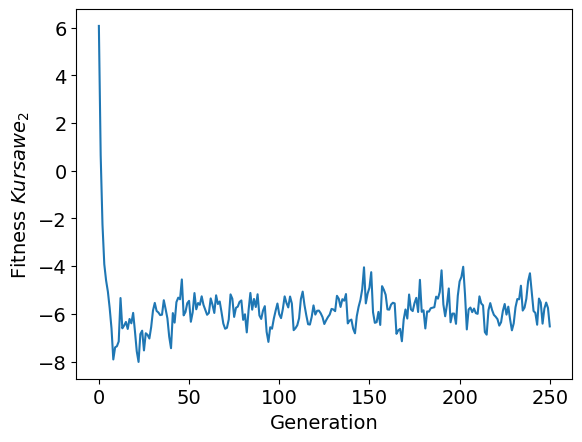

In [62]:
fig2, ax2 = plt.subplots()
line2 = ax2.plot(gen, avgs_kurs_2)
ax2.set_xlabel("Generation")
ax2.set_ylabel(r"Fitness $Kursawe_2$")

Be sure to plot the pareto front at the end. This is possible with the 3 arguments version of this problem. You can plot using a 3D plot in Seaborn. e.g.



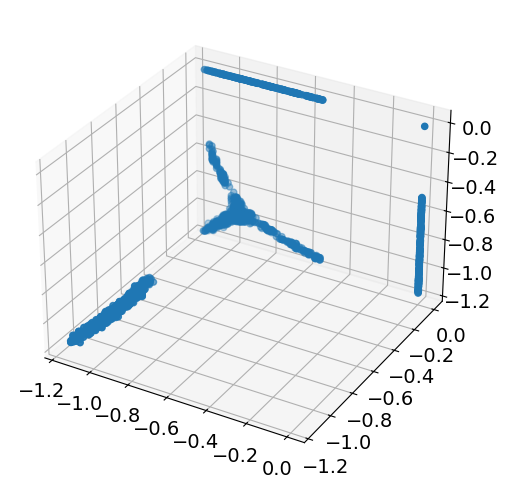

In [72]:
popnp = np.array(hof.items)
fig3d = plt.figure(figsize=(6, 6))
ax = fig3d.add_subplot(111, projection="3d")
ax.scatter(xs=popnp[:, 0], ys=popnp[:, 1], zs=popnp[:, 2], marker="o")

You can also plot fitness in 2D using:

```sns.kdeplot(x,y)```

<Axes: >

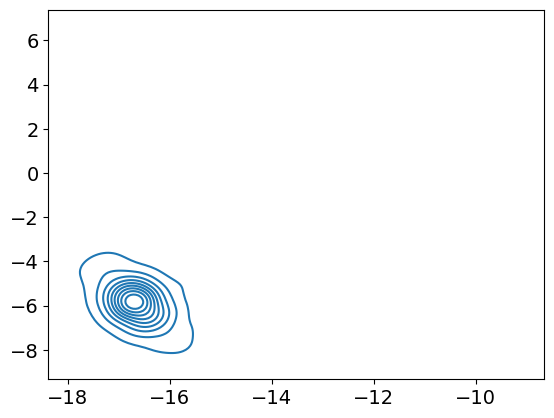

In [64]:
import seaborn as sns

sns.kdeplot(x=avgs_kurs_1, y=avgs_kurs_2)

# <span style="color:blue">Task 2: Manually Implement the Mu Plus Lambda Algorithm</span>

Based on the walkthough, you probably used the built-in Mu Plus Lambda algorithm from DEAP to implement your algorithm. Implementing an EA in this way is important for NGSA II because it ultimately selects from both the parent and a child population together. Mu plus Lamda is technically an **Evolutionary Strategy algorithm**, rather than a Genetic Algorithm, because children are produced before selection. This means you need to generate a child population first. For this, no selection is used. Instead we create a population of offspring by either replicating a parent, crossing over two parents, or replicating and then mutating a parent. These populations are then combined for selection.

You can read more about the MuPlusLamnda algorithm here:
https://deap.readthedocs.io/en/master/api/algo.html

To produce the offspring we can use the DEAP function algorithms.VarOR
https://deap.readthedocs.io/en/master/api/algo.html#deap.algorithms.varOr

*(Note: The VarAnd function is also available and is a shortcut to the approach you have been manually coding before, where you perform crossover and mutation with given probabilities).*

Pseudocode for the algorithm looks like this:

evaluate(population)

for g in range(ngen):    

      offspring = varOr(population, toolbox, lambda_, cxpb, mutpb)

      evaluate(offspring)

      population = select(population + offspring, mu)

**Your task:** Implement this algorithm yourself instead of using the built-in algorithm. You will also need to update the Pareto HoF manually using hof.update(pop)

# <span style="color:blue">Optional Task 3: Implement the knapsack problem using a list or numpy array instead of set</span>

To get you more used to inheriting from different data types for individuals, **your task** is to implement the knapsack problem from the accompanying walkthrough, but represent individuals with a Python dict rather than a set.  This will also require changing the mutation and crossover functions. Allow mutation to remove items from anywhere in the bag, rather than just pop from the top.

Important: If you want to use a numpy array, you must read this first:
https://deap.readthedocs.io/en/master/tutorials/advanced/numpy.html
And for an example see this:
https://deap.readthedocs.io/en/master/examples/ga_onemax_numpy.html?highlight=numpy